In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [325]:
data = pd.read_csv('final_data.csv')
data.head()

,Unnamed: 0,DATE,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,NumNews,Target
0,0,20140219,0.451282,6.538462,1.000000,6.538462,-2.975862,13,NaN
1,1,20140220,1.996429,5.833333,1.071429,5.833333,-2.587891,14,1.0
2,2,20140221,4.394444,6.148148,1.000000,5.592593,-2.688826,9,-1.0
3,3,20140222,0.788095,8.666667,1.000000,8.666667,3.159957,6,-1.0
4,4,20140223,2.726923,8.250000,1.000000,8.250000,-0.974292,13,1.0


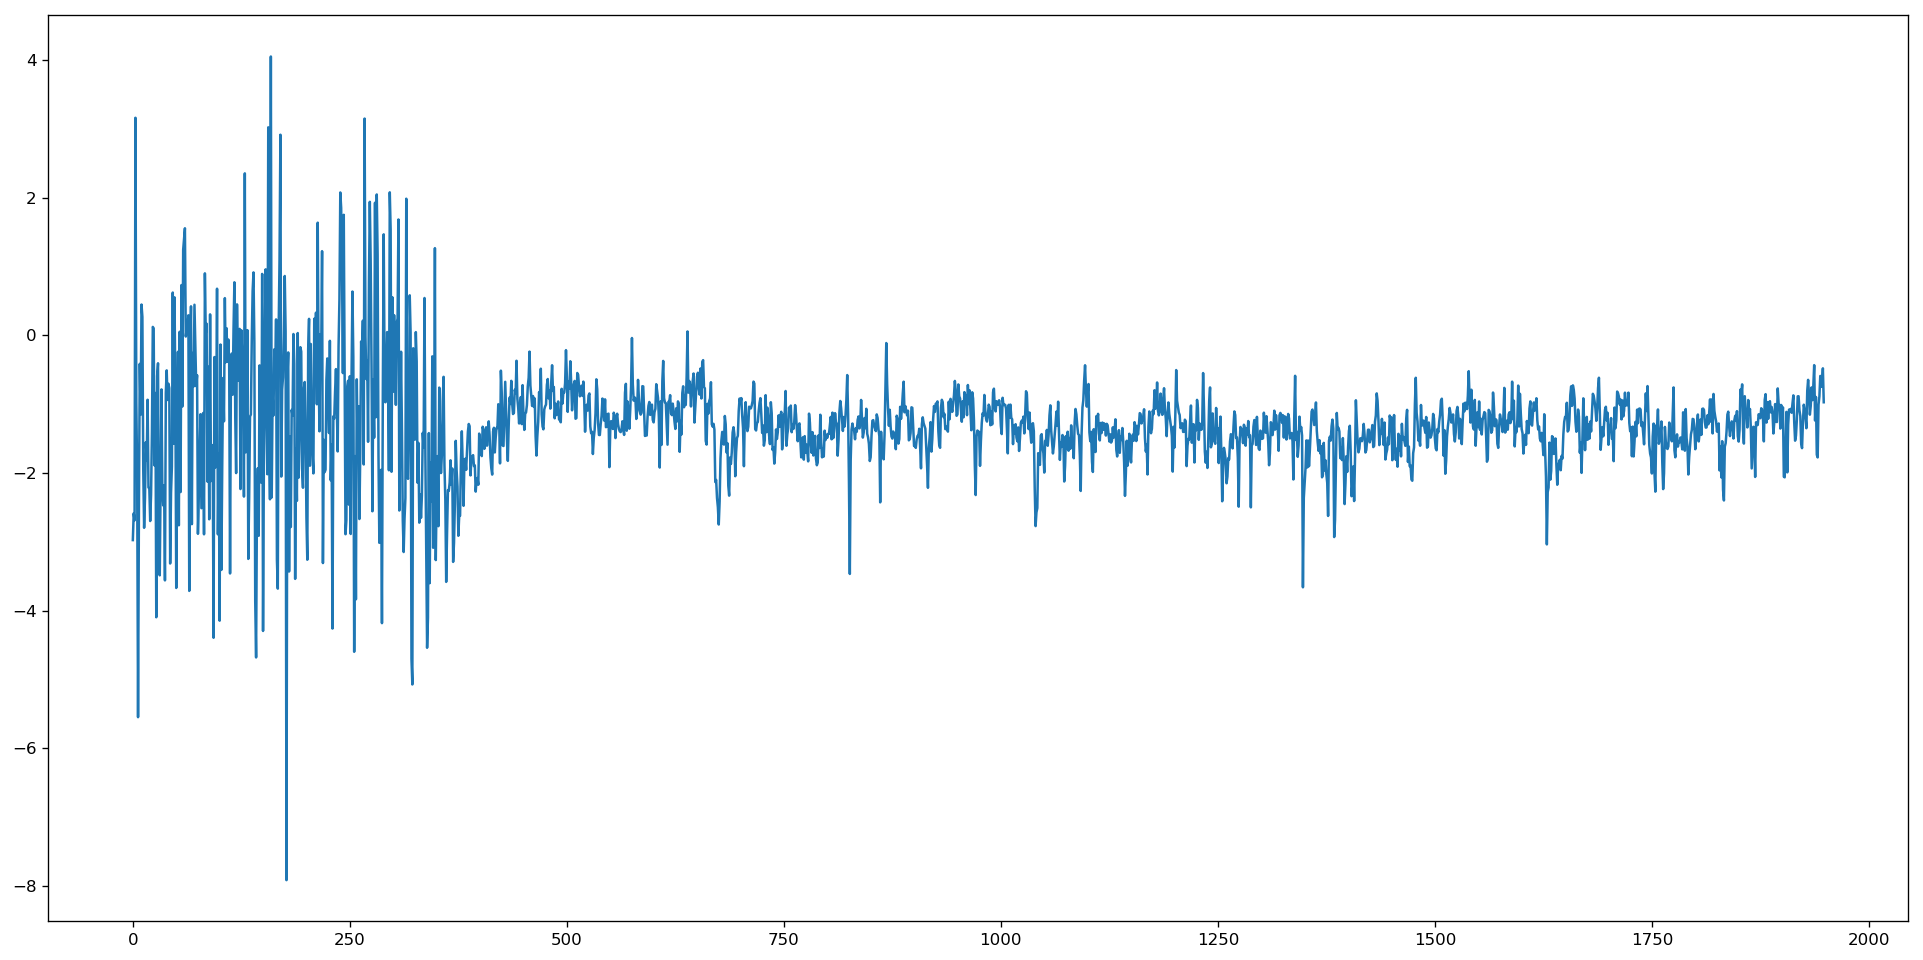

In [249]:
plt.figure(figsize=(20,10))
plt.plot(data['AvgTone'])
plt.show()

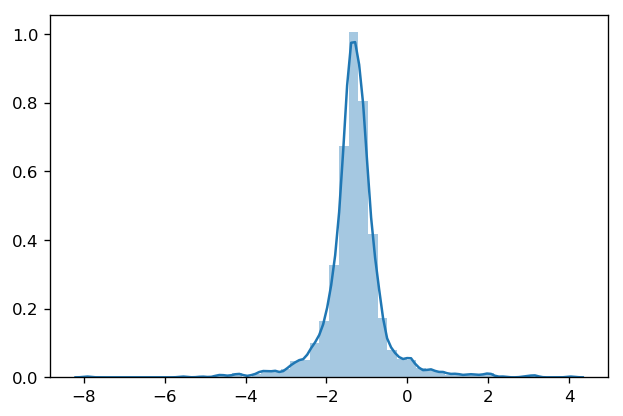

In [210]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})
import seaborn as sns
x = data['AvgTone'].values
sns.distplot(x);

## Data transformation

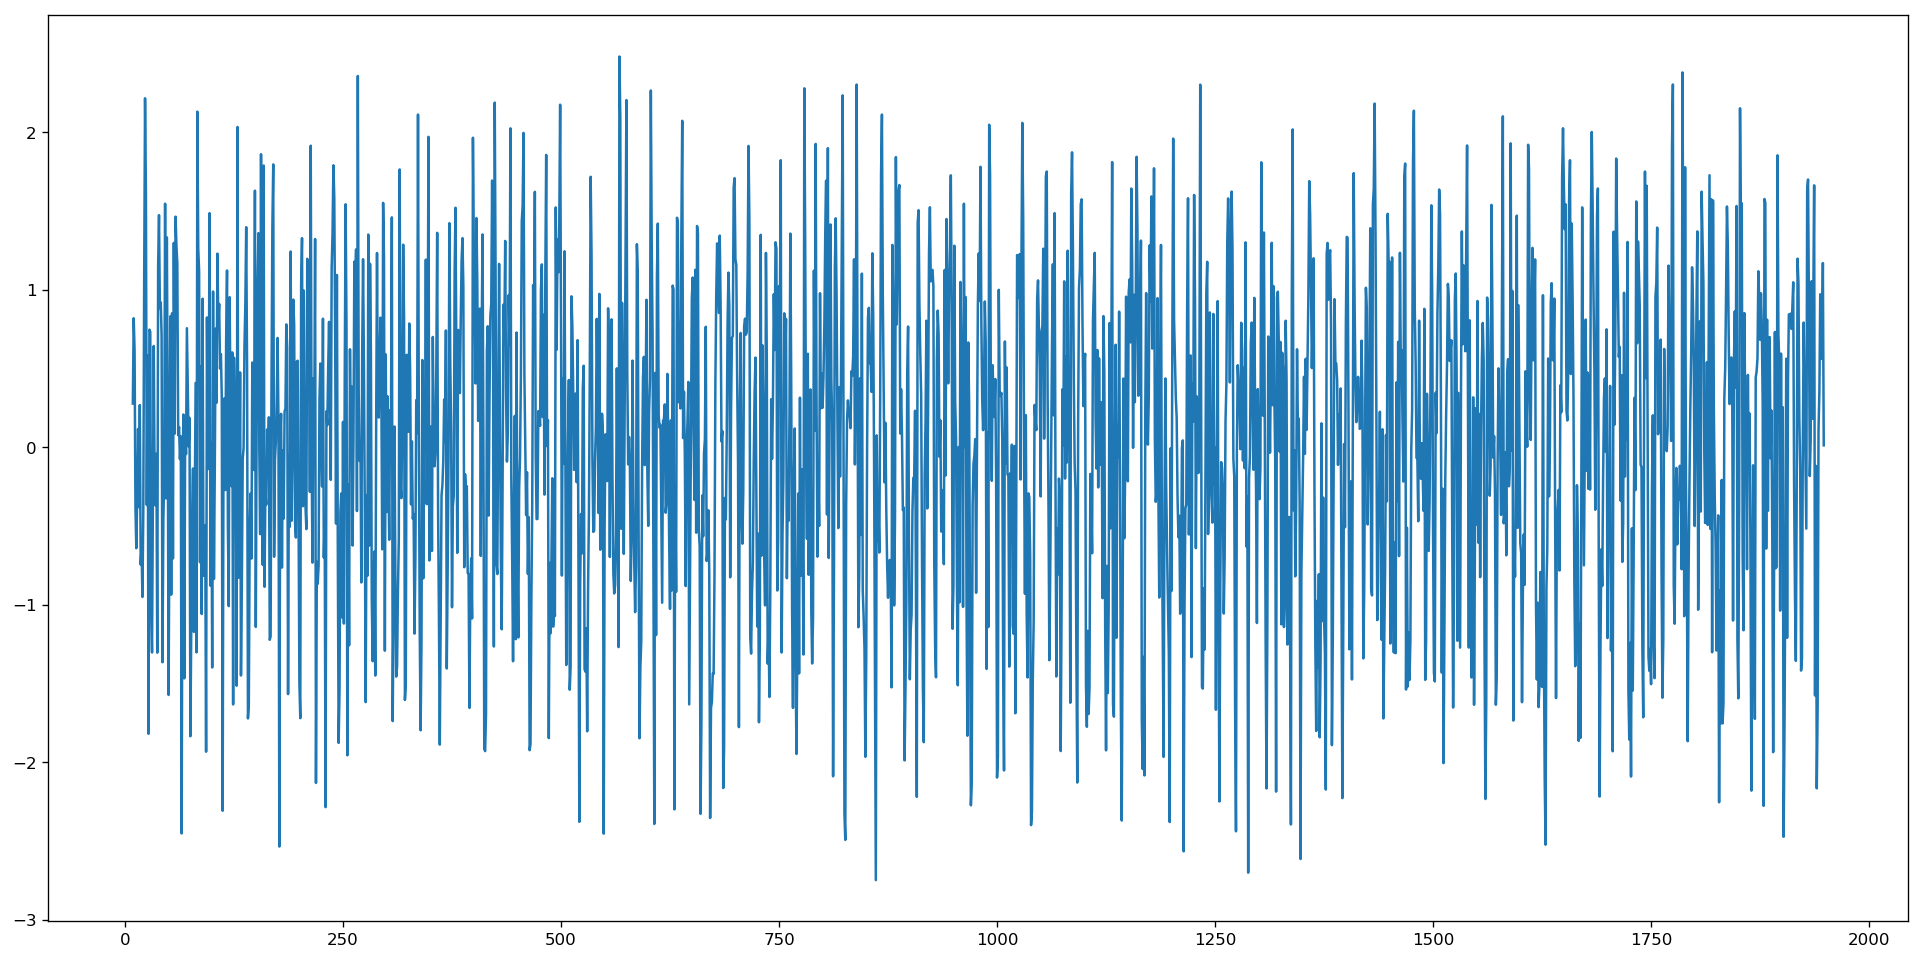

In [187]:
data_copy = pd.DataFrame()
data_copy['AvgTone'] = data['AvgTone']

data_copy['rolling_std']= data_copy['AvgTone'].rolling(10).std()
data_copy['rolling_mean'] = data_copy['AvgTone'].rolling(10).mean()
data_copy['standard'] = (data_copy['AvgTone']-data_copy['rolling_mean'])/data_copy['rolling_std']

plt.figure(figsize=(20,10))
plt.plot(data_copy['standard'].dropna())
plt.show()

In [188]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
df = data['AvgTone'].values
# normality test
stat, p = shapiro(df)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.852, p=0.000
Sample does not look Gaussian (reject H0)


In [211]:
data['AvgTone'].describe()

count    1949.000000
mean       -1.303437
std         0.769765
min        -7.916667
25%        -1.580678
50%        -1.314550
75%        -1.031500
max         4.050129
Name: AvgTone, dtype: float64

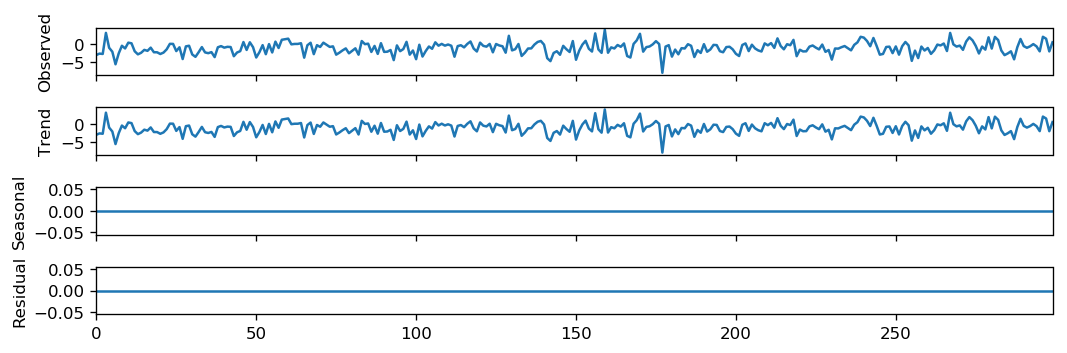

In [282]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = data['AvgTone'].iloc[:300]
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
pyplot.show()

### Check stationarity

In [269]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(data['AvgTone'].iloc[:100])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.107058
p-value: 0.000000


In [258]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

## AR

In [215]:
data.iloc[900:].head()

,Unnamed: 0,DATE,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,NumNews,Target
900,900,20160810,0.630893,8.448072,1.041338,8.270672,-1.608843,1216,-1.0
901,901,20160811,0.793352,8.179350,1.028418,7.987809,-1.601611,1214,-1.0
902,902,20160812,0.652620,8.585680,1.045429,8.395100,-1.635797,1174,-1.0
903,903,20160813,0.473749,8.203596,1.043819,7.947802,-1.513532,777,-1.0
904,904,20160814,0.701971,7.876795,1.043670,7.664295,-1.460994,624,-1.0


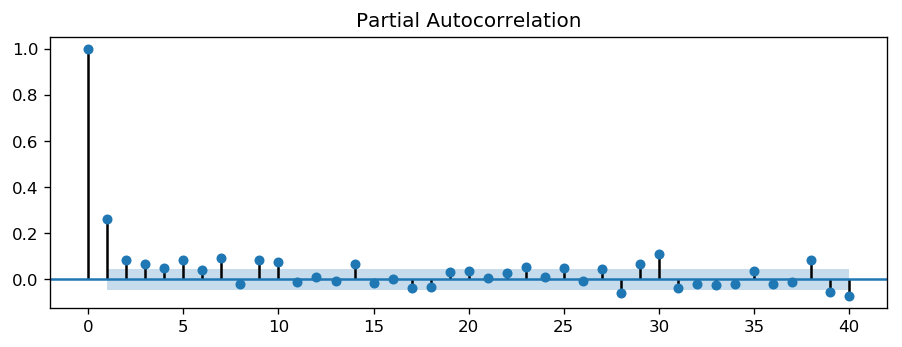

In [250]:
from statsmodels.tsa.stattools import pacf
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(data['AvgTone'].values,lags=40)
plt.show()

## MA

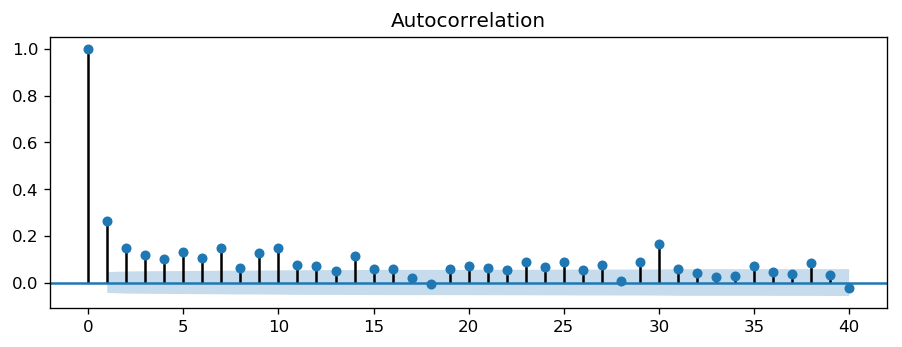

In [251]:
from statsmodels.tsa.stattools import pacf
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(data['AvgTone'].values,lags=40)
plt.show()

### ARIMA model

In [261]:
data = pd.read_csv('final_data.csv')

In [293]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
#model = ARIMA(data_copy['standard'].dropna(), order=(1,0,10))
model = ARIMA(data['AvgTone'].iloc[:], order=(2,0,3))
model_fit = model.fit(trend='c')
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                AvgTone   No. Observations:                 1949
Model:                     ARMA(2, 3)   Log Likelihood               -2148.943
Method:                       css-mle   S.D. of innovations              0.729
Date:                Mon, 19 Aug 2019   AIC                           4311.886
Time:                        16:53:00   BIC                           4350.912
Sample:                             0   HQIC                          4326.234
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3038      0.050    -26.209      0.000      -1.401      -1.206
ar.L1.AvgTone    -0.0156      0.019     -0.808      0.419      -0.054       0.022
ar.L2.AvgTone     0.9361      0.019     

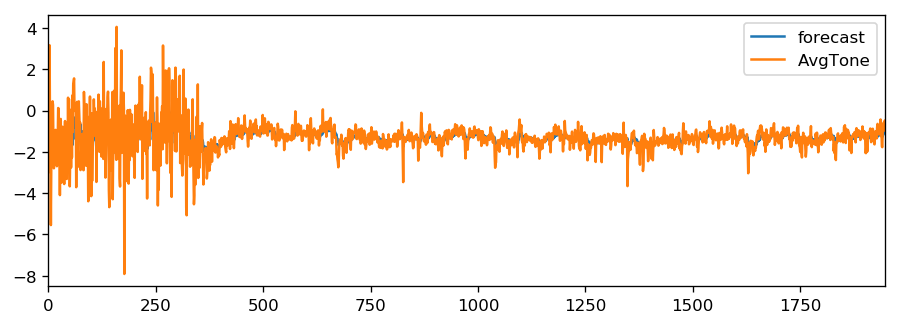

In [294]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [291]:
fc

array([-0.90161883, -1.26703519, -1.21936183, -1.33366271, -1.24349002,
       -1.33164944, -1.25024719, -1.32649735, -1.25533452, -1.32181136,
       -1.25972667, -1.3177129 , -1.26355541, -1.31413716, -1.2668951 ])

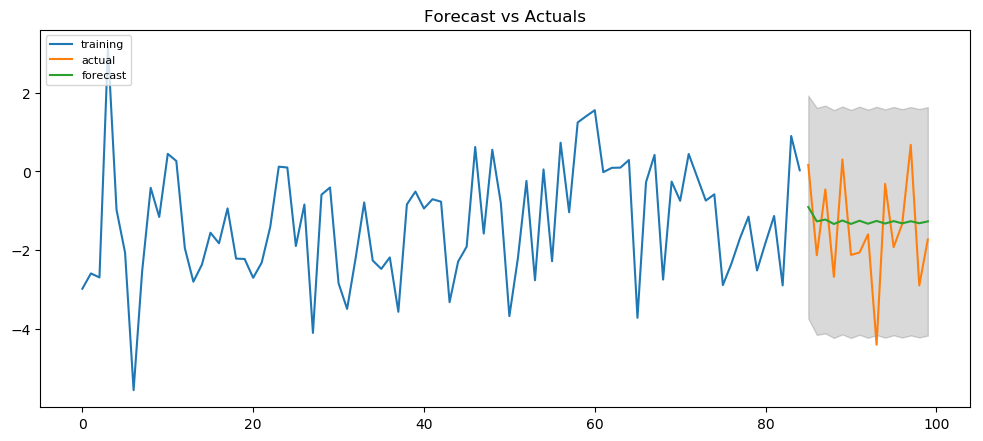

In [295]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data['AvgTone'][:85]
test = data['AvgTone'][85:100]

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(2, 0, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15,alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [15]:
from pandas.plotting import autocorrelation_plot

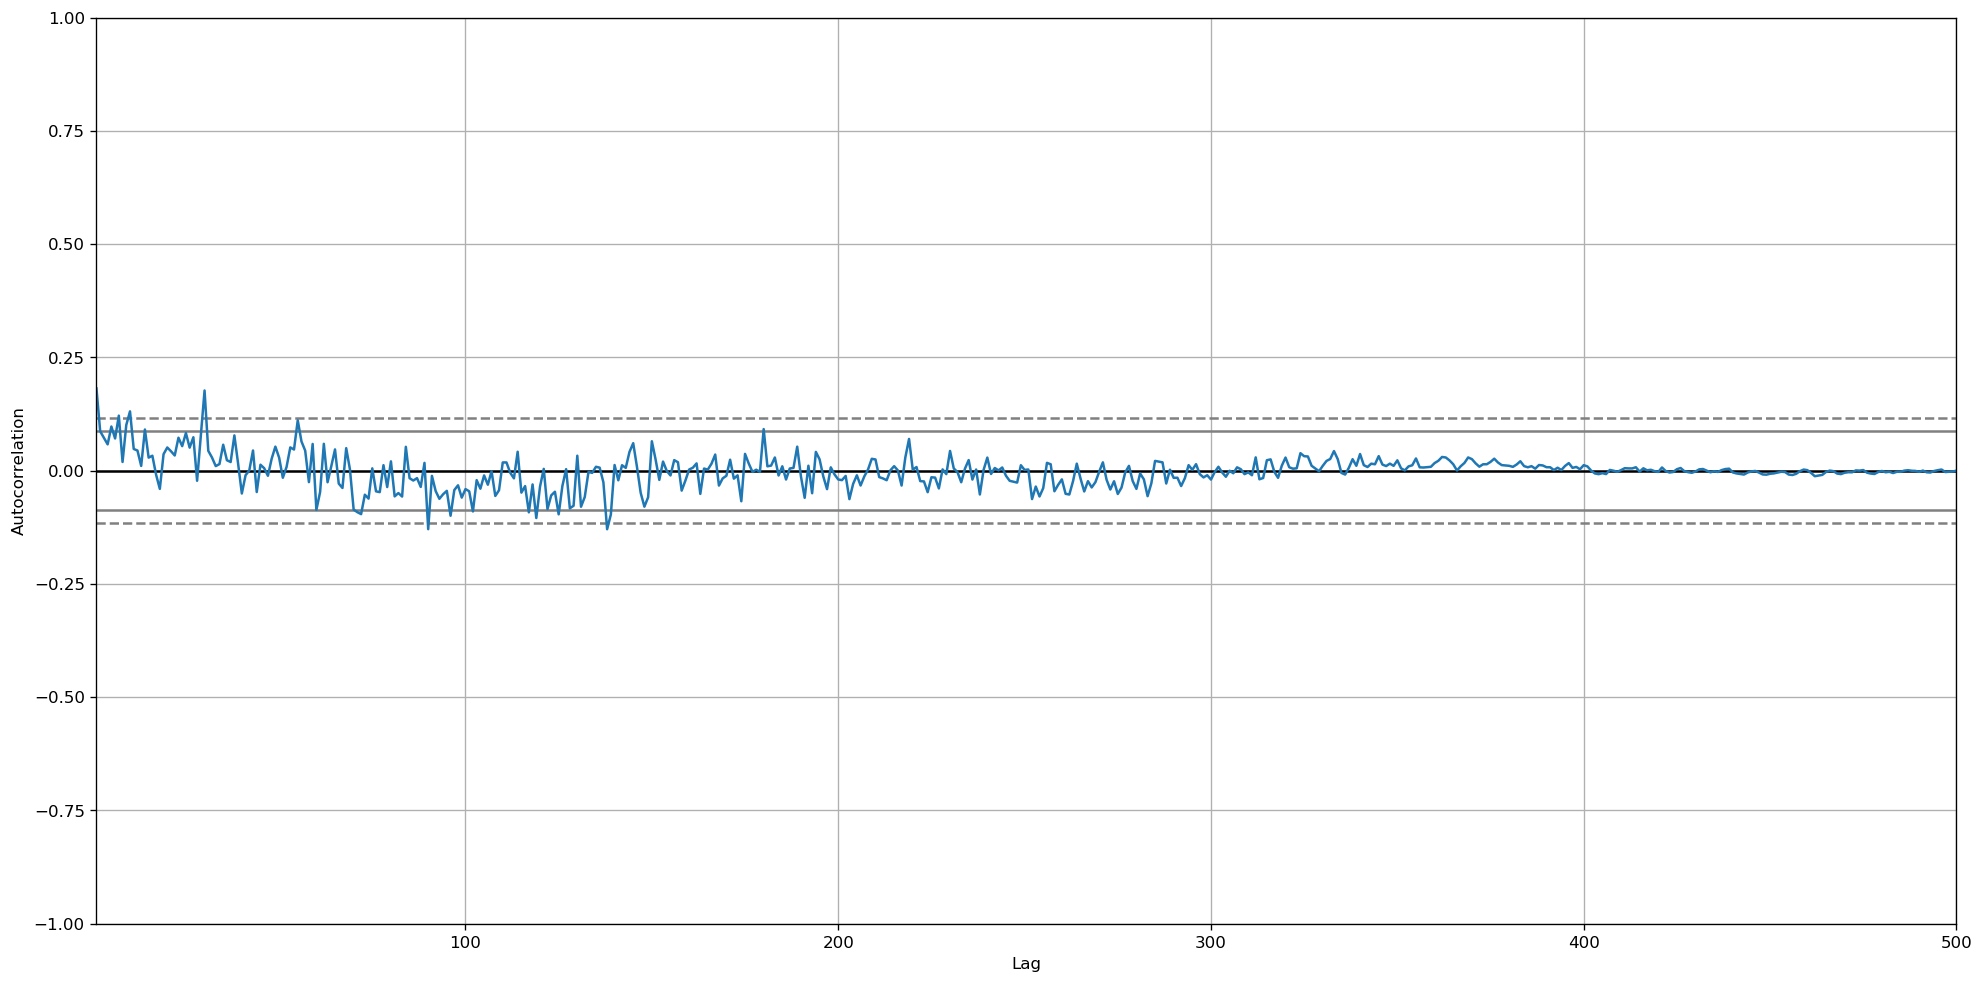

In [297]:
plt.figure(figsize=(20,10))
autocorrelation_plot(data['AvgTone'].iloc[:500])
plt.show()

###  DNN

In [488]:
from keras.models import Sequential
from keras.layers import Dense
data = pd.read_csv('final_data.csv')
data.head()
data = data.iloc[1:]
data.shape

(1948, 9)

In [489]:
data['Target'] = data['Target'].apply(lambda x : 0 if x ==-1.0 else x)
data.head()

,Unnamed: 0,DATE,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,NumNews,Target
1,1,20140220,1.996429,5.833333,1.071429,5.833333,-2.587891,14,1.0
2,2,20140221,4.394444,6.148148,1.000000,5.592593,-2.688826,9,0.0
3,3,20140222,0.788095,8.666667,1.000000,8.666667,3.159957,6,0.0
4,4,20140223,2.726923,8.250000,1.000000,8.250000,-0.974292,13,1.0
5,5,20140224,2.414286,6.535714,1.000000,6.535714,-2.061723,7,0.0


In [490]:
data['Target_future'] = data['Target'].shift(-1)
data = data.iloc[:-1]

In [491]:
data.head()

,Unnamed: 0,DATE,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,NumNews,Target,Target_future
1,1,20140220,1.996429,5.833333,1.071429,5.833333,-2.587891,14,1.0,0.0
2,2,20140221,4.394444,6.148148,1.000000,5.592593,-2.688826,9,0.0,0.0
3,3,20140222,0.788095,8.666667,1.000000,8.666667,3.159957,6,0.0,1.0
4,4,20140223,2.726923,8.250000,1.000000,8.250000,-0.974292,13,1.0,0.0
5,5,20140224,2.414286,6.535714,1.000000,6.535714,-2.061723,7,0.0,0.0


In [492]:
data.tail()

,Unnamed: 0,DATE,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,NumNews,Target,Target_future
1943,1943,20190619,1.158042,7.285959,1.006974,7.195358,-0.887435,666,0.0,0.0
1944,1944,20190620,0.825774,7.342714,1.012249,7.256594,-0.590881,657,0.0,1.0
1945,1945,20190621,1.090542,7.547707,1.042420,7.373861,-0.749676,664,1.0,0.0
1946,1946,20190622,1.261285,7.473265,1.044753,7.267667,-0.695831,486,0.0,1.0
1947,1947,20190623,1.072568,7.276040,1.012045,7.173401,-0.480150,577,1.0,1.0


In [493]:
data.shape

(1947, 10)

In [498]:
from sklearn.preprocessing import MinMaxScaler

X = data[['GoldsteinScale','NumMentions','NumArticles','NumSources','NumNews','AvgTone']]
print(X.shape)
#data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(X))
X_preprocessed = scaler.transform(X)
print(X_preprocessed.shape)
Y = data['Target_future']
#MinMaxScaler(copy=True, feature_range=(0, 1))
print(scaler.data_max_)
print(scaler.transform(X))

(1947, 6)
MinMaxScaler(copy=True, feature_range=(0, 1))
(1947, 6)
[7.00000000e+00 6.62222222e+01 6.62222222e+01 7.00000000e+00
 4.99600000e+03 4.05012909e+00]
[[0.70567227 0.05231037 0.05231037 0.01190476 0.0026026  0.4452968 ]
 [0.84673203 0.0572508  0.0485324  0.         0.0016016  0.43686222]
 [0.63459384 0.09677419 0.09677419 0.         0.001001   0.92561319]
 ...
 [0.65238483 0.07921423 0.07648605 0.00706995 0.13273273 0.59890639]
 [0.66242853 0.078046   0.07481953 0.00745885 0.0970971  0.60340591]
 [0.65132754 0.07495093 0.07334021 0.00200751 0.11531532 0.62142921]]


C:\Program1\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [495]:
len(X_preprocessed)

1947

In [506]:
df_x = pd.DataFrame(X_preprocessed)
df_x['6'] = data['Target']
df_x['6'] = df_x['6'].shift(-1)
df_x['6'].iloc[-1] = 1.0
df_x.head()

,0,1,2,3,4,5,6
0,0.705672,0.052310,0.052310,0.011905,0.002603,0.445297,1.0
1,0.846732,0.057251,0.048532,0.000000,0.001602,0.436862,0.0
2,0.634594,0.096774,0.096774,0.000000,0.001001,0.925613,0.0
3,0.748643,0.090235,0.090235,0.000000,0.002402,0.580136,1.0
4,0.730252,0.063333,0.063333,0.000000,0.001201,0.489266,0.0


In [511]:
len(X_preprocessed)

1947

In [512]:
X_preprocessed = df_x.values
X_preprocessed_train = X_preprocessed[:-500]
Y_train = Y[:-500]

X_preprocessed_test = X_preprocessed[-500:]
Y_test = Y[-500:]

In [520]:
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [407]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# evaluate baseline model with standardized dataset
seed = 7
np.random.seed(seed)

# evaluate model with standardized dataset
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X_preprocessed_train, Y_train, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [521]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [522]:
model.fit(X_preprocessed_train, Y_train, epochs=100, batch_size=100)

Epoch 1/100
1447/1447 [==============================] - 1s 517us/step - loss: 0.6979 - acc: 0.5259
Epoch 2/100
1447/1447 [==============================] - 0s 12us/step - loss: 0.6945 - acc: 0.5273
Epoch 3/100
1447/1447 [==============================] - 0s 15us/step - loss: 0.6927 - acc: 0.5280
Epoch 4/100
1447/1447 [==============================] - 0s 14us/step - loss: 0.6923 - acc: 0.5273
Epoch 5/100
1447/1447 [==============================] - 0s 14us/step - loss: 0.6911 - acc: 0.5301
Epoch 6/100
1447/1447 [==============================] - 0s 14us/step - loss: 0.6905 - acc: 0.5328
Epoch 7/100
1447/1447 [==============================] - 0s 12us/step - loss: 0.6902 - acc: 0.5287
Epoch 8/100
1447/1447 [==============================] - 0s 13us/step - loss: 0.6896 - acc: 0.5294
Epoch 9/100
1447/1447 [==============================] - 0s 14us/step - loss: 0.6893 - acc: 0.5301
Epoch 10/100
1447/1447 [==============================] - 0s 14us/step - loss: 0.6889 - acc: 0.5301
Epoch 11

1447/1447 [==============================] - 0s 13us/step - loss: 0.6493 - acc: 0.6337
Epoch 83/100
1447/1447 [==============================] - 0s 13us/step - loss: 0.6501 - acc: 0.6386
Epoch 84/100
1447/1447 [==============================] - 0s 14us/step - loss: 0.6493 - acc: 0.6310
Epoch 85/100
1447/1447 [==============================] - 0s 11us/step - loss: 0.6483 - acc: 0.6317
Epoch 86/100
1447/1447 [==============================] - 0s 12us/step - loss: 0.6486 - acc: 0.6282
Epoch 87/100
1447/1447 [==============================] - 0s 12us/step - loss: 0.6467 - acc: 0.6310
Epoch 88/100
1447/1447 [==============================] - 0s 14us/step - loss: 0.6464 - acc: 0.6275
Epoch 89/100
1447/1447 [==============================] - 0s 12us/step - loss: 0.6479 - acc: 0.6372
Epoch 90/100
1447/1447 [==============================] - 0s 13us/step - loss: 0.6466 - acc: 0.6337
Epoch 91/100
1447/1447 [==============================] - 0s 12us/step - loss: 0.6470 - acc: 0.6317
Epoch 92/100


In [523]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

ValueError: Error when checking input: expected dense_77_input to have shape (7,) but got array with shape (6,)